<a href="https://colab.research.google.com/github/ebudd45/Meteorologyclass/blob/main/sounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install siphon
!pip install metpy

In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units, pandas_dataframe_to_unit_arrays
from metpy.plots import SkewT, Hodograph, add_metpy_logo
import metpy.calc as mpcalc
from siphon.simplewebservice.wyoming import WyomingUpperAir
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
 #set date and station
date = datetime(2013, 11, 17, 15)

station = input('Input station id:')
#station=input('Station id:')

df = WyomingUpperAir.request_data(date, station)

Input station id:ilx


In [5]:
print('initial data')
df

initial data


,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,975.0,178,21.0,17.4,190.0,20.0,3.472964,19.696155,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
1,965.0,268,20.2,15.8,192.0,25.0,5.197792,24.453690,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
2,927.7,610,17.0,14.7,200.0,44.0,15.048886,41.346475,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
3,925.0,635,16.8,14.6,200.0,45.0,15.390906,42.286168,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
4,921.0,672,16.4,14.5,202.0,46.0,17.231903,42.650457,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,7.5,32604,-54.5,NaN,273.0,69.0,68.905438,-3.611181,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
156,7.2,32868,-52.5,NaN,275.0,66.0,65.748850,-5.752279,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
157,7.1,32918,-52.4,NaN,275.0,65.0,64.752655,-5.665123,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83
158,7.0,33050,-52.3,NaN,275.0,66.0,65.748850,-5.752279,ILX,74560,2013-11-17 15:00:00,40.15,-89.33,178.0,26.83


In [6]:
#add in appropiate units

data = pandas_dataframe_to_unit_arrays(df)
#print(data_with_units)

subset_to_100 = data['pressure'] >= 150 * units.hPa

# Subset pressure and read in other data to only 100 mb
p = data['pressure']
height = data['height']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']
deg = data['direction']
spd = data['speed']
#print(df.units)

In [7]:
#compute variables

#potential temp
pot = mpcalc.potential_temperature(p, T)

#relative humidity
rh = mpcalc.relative_humidity_from_dewpoint(T, Td)

#mixing ratio
mix = mpcalc.mixing_ratio_from_relative_humidity(p, T, rh)

#calculate path and levels from parcel

prof = (mpcalc.parcel_profile(p, T[0], Td[0])).to('degC')

#LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])

#LFC
lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td, which='top')

#EL
el_pressure, el_temperature = mpcalc.el(p, T, Td, which='top')

#SBCAPE and SBCIN
cape, cin = mpcalc.cape_cin(p, T, Td, prof)

#mixed layer CAPE
ML_cape, ML_cin = mpcalc.mixed_layer_cape_cin(p,T,Td)


#MUCAP and MUCIN
MU_cape, MU_cin = mpcalc.most_unstable_cape_cin(p, T, Td)

#precipitable water
pwat = mpcalc.precipitable_water(p, Td).to('inches')

#bulk shear
bulk_shear = mpcalc.bulk_shear(p, u, v, height=None, bottom=None, depth=None)

#bunkers storm motion
right_mover,left_mover,wind_mean = mpcalc.bunkers_storm_motion(p, u, v, height)

#helicity
pos_SRH,neg_SRH,total_SRH = mpcalc.storm_relative_helicity(height, v, v, 3000*units.meter, bottom=height[0],
                                                           storm_u=right_mover[0], storm_v=right_mover[1])

#SWEAT Index
sweat = mpcalc.sweat_index(p, T, Td, spd, deg, vertical_dim=0)

<ipython-input-7-3ae3aac2d053>:14: UserWarning: Duplicate pressure(s) [8.2 11.4 118.0 746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  prof = (mpcalc.parcel_profile(p, T[0], Td[0])).to('degC')
<ipython-input-7-3ae3aac2d053>:20: UserWarning: Duplicate pressure(s) [746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td, which='top')
<ipython-input-7-3ae3aac2d053>:23: UserWarning: Duplicate pressure(s) [746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  el_pressure, el_temperature = mpcalc.el(p, T, Td, which='top')
<ipython-input-7-3ae3aac2d053>:29: UserWarning: Duplicate pressure(s) [8.2 11.4 118.0 746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  ML_cape, ML_cin = mpcalc.mixed_layer_cape_cin(p,T,Td)
<ipython-input-7-3ae3aac2d053>:33: UserWarning: Duplicate pressure(s) [746.0] hPa provided. Output profile includ

In [8]:
#calculate LI
def lifted_index(T,prof):
    '''this function calculates the lifted index.

       inputs:
       T = temperature
       prof = profile

       outputs: lifted_index'''

    tenv = T[np.where(p.m==500)]
    tpar = prof[np.where(p.m==500)]
    lifted_index = tenv-tpar
    return lifted_index[0]

li=lifted_index(T,prof).m

print(li)

-5.465924607200998


In [17]:
#calculate EHI
def energetic_helicity_index(cape,pos_SRH):
    '''this function calculates the EHI.

       inputs:
       cape = convective available potential energy
       pos_SRH = storm relative helicity

       outputs: energetic_helicity_index'''


    energetic_helicity_index = (cape*pos_SRH)/160000
    return energetic_helicity_index

EHI = energetic_helicity_index(cape,pos_SRH).m

print(EHI)

1.3522626513808902


In [9]:
#calculate TT
def total_totals(T,Td):

    '''This is a function to calculate the total totals.

       inputs:
       T=temperature
       td=dew point

       outputs:
       total totals'''

    t850 = T[np.where(p.m ==850)]
    t500 = T[np.where(p.m ==500)]
    td850 = Td[np.where(p.m ==850)]
    vt = t850 -t500
    ct = td850 - t500

    total_totals = vt + ct
    return total_totals[0]

tt = total_totals(T,Td).m

print(tt)

53.5


/usr/local/lib/python3.11/dist-packages/metpy/plots/skewt.py:370: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k_" (-> color='k'). The keyword argument will take precedence.
  return self.ax.plot(t, pressure, *args, **kwargs)


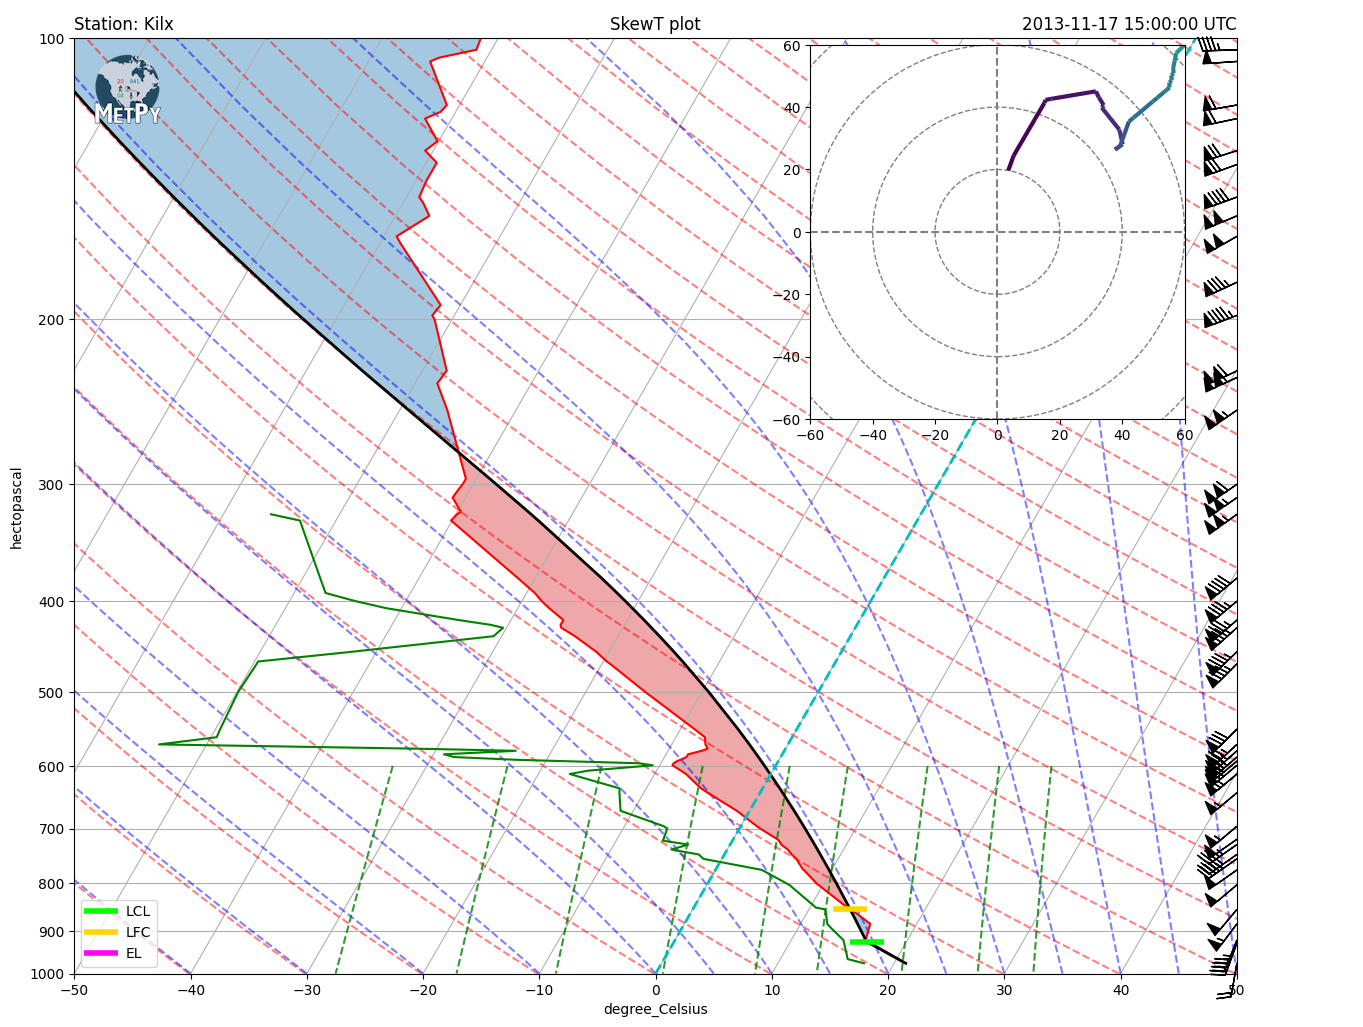

In [10]:
#plot sounding
fig = plt.figure(figsize=(15, 15))

skew = SkewT(fig)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Plot barbs skipping to every other barb
skew.plot_barbs(p[::2], u[::2], v[::2], y_clip_radius=0.03)

# Set sensible axis limits
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 50)

# Plot the skew-T parcel temperature profile
skew.plot(p, prof, 'k', linewidth=2)

# Plot a line marker at the LCL/LFC/EL level
skew.plot(lcl_pressure, lcl_temperature, 'k_', markersize=25,
          markeredgewidth=4, color='lime', label='LCL')
skew.plot(lfc_pressure, lfc_temperature, 'k_', markersize=25,
          markeredgewidth=4, color='gold', label='LFC')
skew.plot(el_pressure, el_temperature, 'k_', markersize=25,
          markeredgewidth=4, color='magenta', label='EL')



# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,555,10)*units.K)
skew.plot_moist_adiabats(color='tab:green')
skew.plot_mixing_lines(color='tab:blue')
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

# Plot titles
plt.title('Station: K{}'.format(station), loc='left')
plt.title('SkewT plot', loc='center')
plt.title('{} UTC'.format(date), loc='right')


plt.legend(loc='lower left')
add_metpy_logo(fig, 90, 900)

# Create a hodograph
data['height'] = data['height'] - data['height'][0]
boundaries = [0, 1, 3, 5, 8] * units.km
(_, u_trimmed, v_trimmed,
 speed_trimmed, height_trimmed) = mpcalc.get_layer(data['pressure'],
                                                   data['u_wind'],
                                                   data['v_wind'],
                                                   data['speed'],
                                                   data['height'],
                                                   height=data['height'],
                                                   depth=10 * units.km)
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:olive']
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=1)
h = Hodograph(ax_hod, component_range=60.)
h.add_grid(increment=20)
h.plot_colormapped(u_trimmed, v_trimmed, height_trimmed)

# Show the plot
plt.show()

In [11]:
#print out variables
print(f'Surface based CAPE: {cape}')
print(f'Surface based CIN: {cin}')
print()
print(f'MU based CAPE: {MU_cape}')
print(f'MU based CIN: {MU_cin}')
print()
print(f'ML based CAPE: {ML_cape}')
print(f'ML based CIN: {ML_cin}')
print()
print(f'Lifted Index: {li}')
print(f'Total Totals: {tt}')
print(f'Precipitable water: {pwat}')
print(f'0-3km SRH: {pos_SRH}')
print(f'EHI: {EHI}')
print(f'SWEAT: {sweat}')
print()

if(((cape.m>=1500) and (li<=-2) and (cin.m>=-100) and (pos_SRH.m>=100) or (EHI>=1))):
   print('Severe weather possible')
else:
   print('Severe weather not likley')

Surface based CAPE: 1643.366302891547 joule / kilogram
Surface based CIN: -4.082158016393719 joule / kilogram

MU based CAPE: 1643.3663175269355 joule / kilogram
MU based CIN: -4.090589732367878 joule / kilogram

ML based CAPE: 1120.0453353705977 joule / kilogram
ML based CIN: -45.56188294257574 joule / kilogram

Lifted Index: -5.465924607200998
Total Totals: 53.5
Precipitable water: 1.051633486073965 inch
0-3km SRH: 131.65781958669083 meter ** 2 / second ** 2


NameError: name 'EHI' is not defined

<ipython-input-16-3e98a497c4b3>:63: UserWarning: Duplicate pressure(s) [8.2 11.4 118.0 746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
<ipython-input-16-3e98a497c4b3>:137: UserWarning: Duplicate pressure(s) [8.2 11.4 118.0 746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, Td, depth=50 * units.hPa)
<ipython-input-16-3e98a497c4b3>:141: UserWarning: Duplicate pressure(s) [746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  mucape, mucin = mpcalc.most_unstable_cape_cin(p, T, Td, depth=50 * units.hPa)
<ipython-input-16-3e98a497c4b3>:149: UserWarning: Duplicate pressure(s) [746.0] hPa provided. Output profile includes duplicate temperatures as a result.
  sbcape, sbcin = mpcalc.surface_based_cape_cin(p, T, Td)


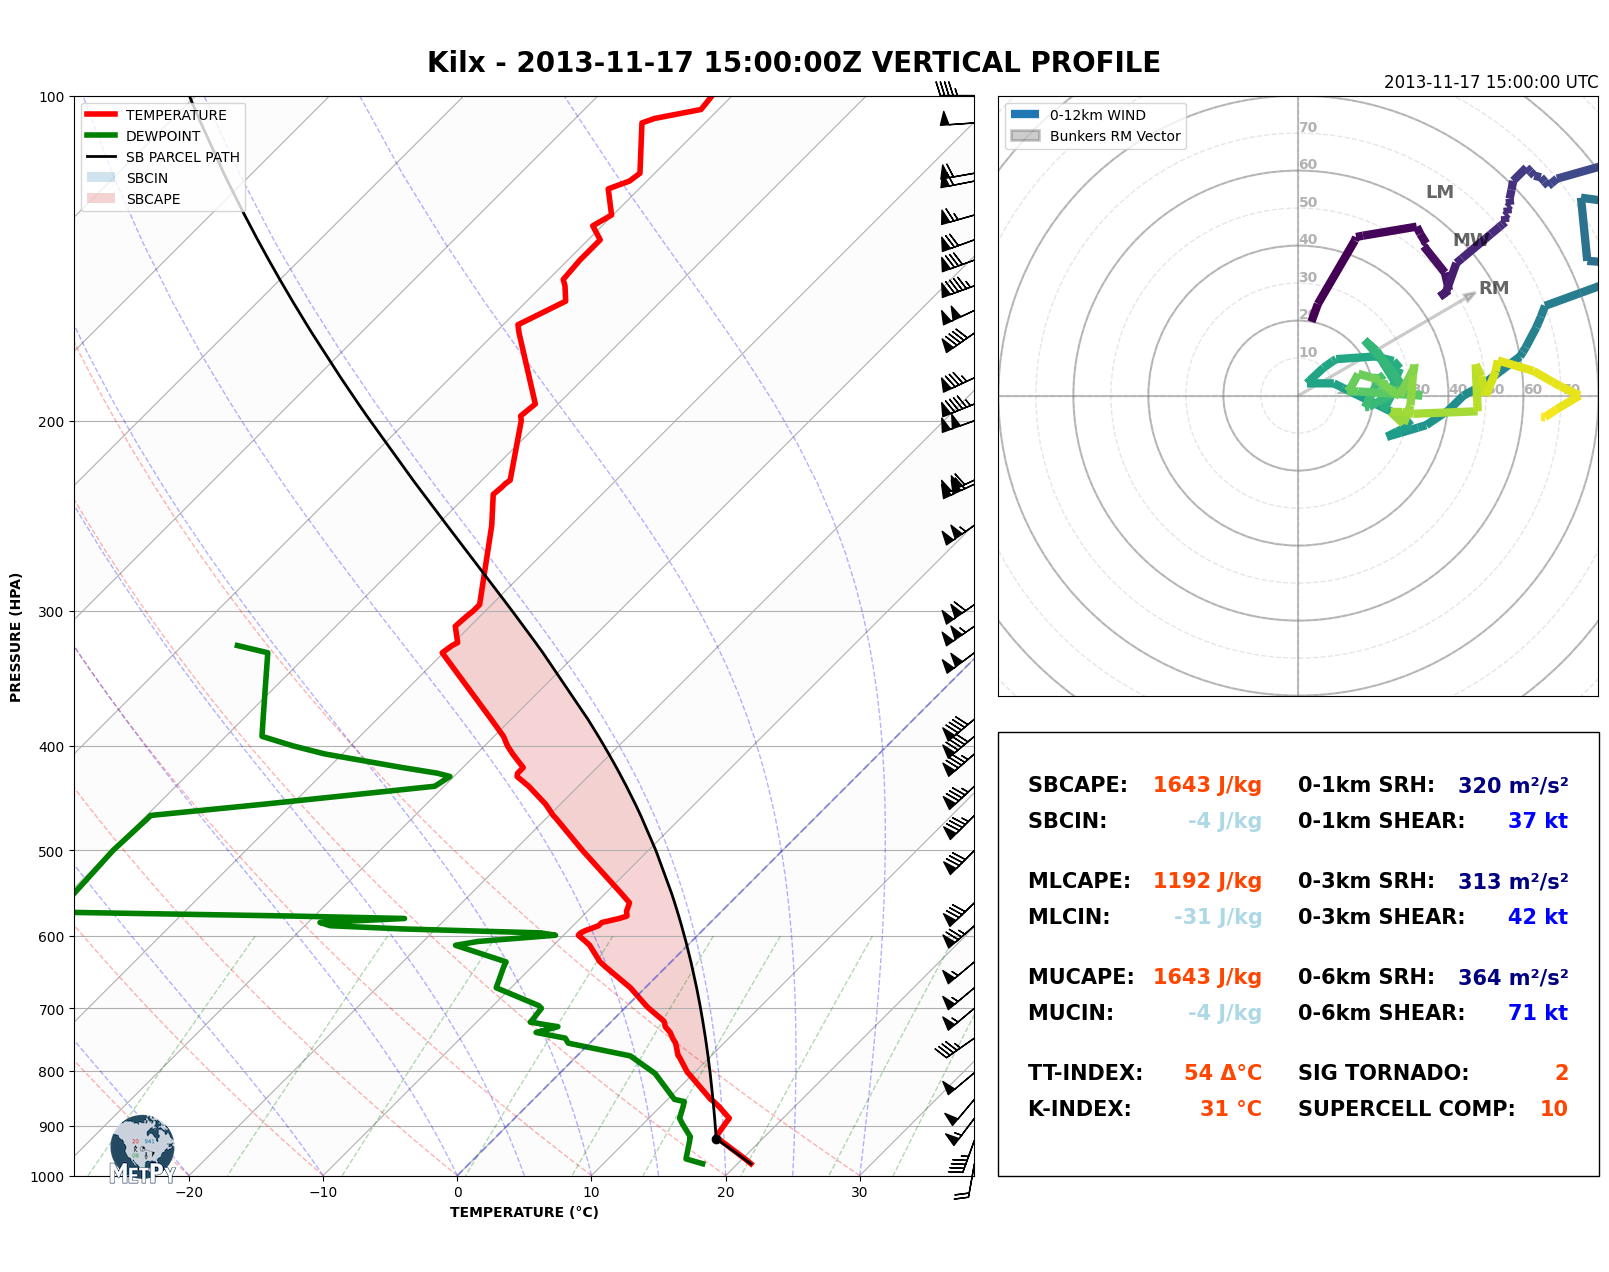

In [16]:
# STEP 1: CREATE THE SKEW-T OBJECT AND MODIFY IT TO CREATE A
# NICE, CLEAN PLOT
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(18, 12))
skew = SkewT(fig, rotation=45, rect=(0.05, 0.05, 0.50, 0.90))

# add the Metpy logo
add_metpy_logo(fig, 105, 85, size='small')

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-20, 30)

# Set some better labels than the default to increase readability
skew.ax.set_xlabel(str.upper(f'Temperature ({T.units:~P})'), weight='bold')
skew.ax.set_ylabel(str.upper(f'Pressure ({p.units:~P})'), weight='bold')

# Set the facecolor of the skew-t object and the figure to white
fig.set_facecolor('#ffffff')
skew.ax.set_facecolor('#ffffff')

# Here we can use some basic math and Python functionality to make a cool
# shaded isotherm pattern.
x1 = np.linspace(-100, 40, 8)
x2 = np.linspace(-90, 50, 8)
y = [1100, 50]
for i in range(8):
    skew.shade_area(y=y, x1=x1[i], x2=x2[i], color='gray', alpha=0.02, zorder=1)

# STEP 2: PLOT DATA ON THE SKEW-T. TAKE A COUPLE EXTRA STEPS TO
# INCREASE READABILITY
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
# Set the linewidth to 4 for increased readability.
# We will also add the 'label' keyword argument for our legend.
skew.plot(p, T, 'r', lw=4, label='TEMPERATURE')
skew.plot(p, Td, 'g', lw=4, label='DEWPOINT')

# Again we can use some simple Python math functionality to 'resample'
# the wind barbs for a cleaner output with increased readability.
# Something like this would work.
interval = np.logspace(2, 3, 40) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(pressure=p[idx], u=u[idx], v=v[idx])

# Add the relevant special lines native to the Skew-T Log-P diagram &
# provide basic adjustments to linewidth and alpha to increase readability
# first, we add a matplotlib axvline to highlight the 0-degree isotherm
skew.ax.axvline(0 * units.degC, linestyle='--', color='blue', alpha=0.3)
skew.plot_dry_adiabats(lw=1, alpha=0.3)
skew.plot_moist_adiabats(lw=1, alpha=0.3)
skew.plot_mixing_lines(lw=1, alpha=0.3)

# Calculate LCL height and plot as a black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from a low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2, label='SB PARCEL PATH')

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof, Td, alpha=0.2, label='SBCIN')
skew.shade_cape(p, T, prof, alpha=0.2, label='SBCAPE')

# STEP 3: CREATE THE HODOGRAPH INSET. TAKE A FEW EXTRA STEPS TO
# INCREASE READABILITY
# Create a hodograph object: first we need to add an axis
# then we can create the Metpy Hodograph
hodo_ax = plt.axes((0.48, 0.45, 0.5, 0.5))
h = Hodograph(hodo_ax, component_range=80.)

# Add two separate grid increments for a cooler look. This also
# helps to increase readability
h.add_grid(increment=20, ls='-', lw=1.5, alpha=0.5)
h.add_grid(increment=10, ls='--', lw=1, alpha=0.2)

# The next few steps makes for a clean hodograph inset, removing the
# tick marks, tick labels, and axis labels
h.ax.set_box_aspect(1)
h.ax.set_yticklabels([])
h.ax.set_xticklabels([])
h.ax.set_xticks([])
h.ax.set_yticks([])
h.ax.set_xlabel(' ')
h.ax.set_ylabel(' ')

# Here we can add a simple Python for loop that adds tick marks
# to the inside of the hodograph plot to increase readability!
plt.xticks(np.arange(0, 0, 1))
plt.yticks(np.arange(0, 0, 1))
for i in range(10, 120, 10):
    h.ax.annotate(str(i), (i, 0), xytext=(0, 2), textcoords='offset pixels',
                  clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)
for i in range(10, 120, 10):
    h.ax.annotate(str(i), (0, i), xytext=(0, 2), textcoords='offset pixels',
                  clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)

# plot the hodograph itself, using plot_colormapped, colored
# by height
h.plot_colormapped(u, v, c=height, linewidth=6, label='0-12km WIND')
# compute Bunkers storm motion so we can plot it on the hodograph!
RM, LM, MW = mpcalc.bunkers_storm_motion(p, u, v, height)
h.ax.text((RM[0].m + 0.5), (RM[1].m - 0.5), 'RM', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.text((LM[0].m + 0.5), (LM[1].m - 0.5), 'LM', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.text((MW[0].m + 0.5), (MW[1].m - 0.5), 'MW', weight='bold', ha='left',
          fontsize=13, alpha=0.6)
h.ax.arrow(0, 0, RM[0].m - 0.3, RM[1].m - 0.3, linewidth=2, color='black',
           alpha=0.2, label='Bunkers RM Vector',
           length_includes_head=True, head_width=2)

# STEP 4: ADD A FEW EXTRA ELEMENTS TO REALLY MAKE A NEAT PLOT
# First we want to actually add values of data to the plot for easy viewing
# To do this, let's first add a simple rectangle using Matplotlib's 'patches'
# functionality to add some simple layout for plotting calculated parameters
#                                  xloc   yloc   xsize  ysize
fig.patches.extend([plt.Rectangle((0.563, 0.05), 0.334, 0.37,
                                  edgecolor='black', facecolor='white',
                                  linewidth=1, alpha=1, transform=fig.transFigure,
                                  figure=fig)])

# Now let's take a moment to calculate some simple severe-weather parameters using
# metpy's calculations
# Here are some classic severe parameters!
kindex = mpcalc.k_index(p, T, Td)
total_totals = mpcalc.total_totals_index(p, T, Td)

# mixed layer parcel properties!
ml_t, ml_td = mpcalc.mixed_layer(p, T, Td, depth=50 * units.hPa)
ml_p, _, _ = mpcalc.mixed_parcel(p, T, Td, depth=50 * units.hPa)
mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, Td, depth=50 * units.hPa)

# most unstable parcel properties!
mu_p, mu_t, mu_td, _ = mpcalc.most_unstable_parcel(p, T, Td, depth=50 * units.hPa)
mucape, mucin = mpcalc.most_unstable_cape_cin(p, T, Td, depth=50 * units.hPa)

# Estimate height of LCL in meters from hydrostatic thickness (for sig_tor)
new_p = np.append(p[p > lcl_pressure], lcl_pressure)
new_t = np.append(T[p > lcl_pressure], lcl_temperature)
lcl_height = mpcalc.thickness_hydrostatic(new_p, new_t)

# Compute Surface-based CAPE
sbcape, sbcin = mpcalc.surface_based_cape_cin(p, T, Td)
# Compute SRH
(u_storm, v_storm), *_ = mpcalc.bunkers_storm_motion(p, u, v, height)
*_, total_helicity1 = mpcalc.storm_relative_helicity(height, u, v, depth=1 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity3 = mpcalc.storm_relative_helicity(height, u, v, depth=3 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity6 = mpcalc.storm_relative_helicity(height, u, v, depth=6 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)

# Copmute Bulk Shear components and then magnitude
ubshr1, vbshr1 = mpcalc.bulk_shear(p, u, v, height=height, depth=1 * units.km)
bshear1 = mpcalc.wind_speed(ubshr1, vbshr1)
ubshr3, vbshr3 = mpcalc.bulk_shear(p, u, v, height=height, depth=3 * units.km)
bshear3 = mpcalc.wind_speed(ubshr3, vbshr3)
ubshr6, vbshr6 = mpcalc.bulk_shear(p, u, v, height=height, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

# Use all computed pieces to calculate the Significant Tornado parameter
sig_tor = mpcalc.significant_tornado(sbcape, lcl_height,
                                     total_helicity3, bshear3).to_base_units()

# Perform the calculation of supercell composite if an effective layer exists
super_comp = mpcalc.supercell_composite(mucape, total_helicity3, bshear3)

# There is a lot we can do with this data operationally, so let's plot some of
# these values right on the plot, in the box we made
# First lets plot some thermodynamic parameters
plt.figtext(0.58, 0.37, 'SBCAPE: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.37, f'{sbcape:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.34, 'SBCIN: ', weight='bold',
            fontsize=15, color='black', ha='left')
plt.figtext(0.71, 0.34, f'{sbcin:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.29, 'MLCAPE: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.29, f'{mlcape:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.26, 'MLCIN: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.26, f'{mlcin:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.21, 'MUCAPE: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.21, f'{mucape:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.18, 'MUCIN: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.18, f'{mucin:.0f~P}', weight='bold',
            fontsize=15, color='lightblue', ha='right')
plt.figtext(0.58, 0.13, 'TT-INDEX: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.13, f'{total_totals:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')
plt.figtext(0.58, 0.10, 'K-INDEX: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.71, 0.10, f'{kindex:.0f~P}', weight='bold',
            fontsize=15, color='orangered', ha='right')

# now some kinematic parameters
plt.figtext(0.73, 0.37, '0-1km SRH: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.37, f'{total_helicity1:.0f~P}',
            weight='bold', fontsize=15, color='navy', ha='right')
plt.figtext(0.73, 0.34, '0-1km SHEAR: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.34, f'{bshear1:.0f~P}', weight='bold',
            fontsize=15, color='blue', ha='right')
plt.figtext(0.73, 0.29, '0-3km SRH: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.29, f'{total_helicity3:.0f~P}',
            weight='bold', fontsize=15, color='navy', ha='right')
plt.figtext(0.73, 0.26, '0-3km SHEAR: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.26, f'{bshear3:.0f~P}', weight='bold',
            fontsize=15, color='blue', ha='right')
plt.figtext(0.73, 0.21, '0-6km SRH: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.21, f'{total_helicity6:.0f~P}',
            weight='bold', fontsize=15, color='navy', ha='right')
plt.figtext(0.73, 0.18, '0-6km SHEAR: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.18, f'{bshear6:.0f~P}', weight='bold',
            fontsize=15, color='blue', ha='right')
plt.figtext(0.73, 0.13, 'SIG TORNADO: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.13, f'{sig_tor[0]:.0f~P}', weight='bold', fontsize=15,
            color='orangered', ha='right')
plt.figtext(0.73, 0.10, 'SUPERCELL COMP: ', weight='bold', fontsize=15,
            color='black', ha='left')
plt.figtext(0.88, 0.10, f'{super_comp[0]:.0f~P}', weight='bold', fontsize=15,
            color='orangered', ha='right')

# Add legends to the skew and hodo
skewleg = skew.ax.legend(loc='upper left')
hodoleg = h.ax.legend(loc='upper left')

# add a quick plot title
#plt.figtext(0.45, 0.97, 'OUN | MAY 4TH 1999 - 00Z VERTICAL PROFILE',
#            weight='bold', fontsize=20, ha='center')
plt.figtext(0.45, 0.97, 'K{} - {}Z VERTICAL PROFILE'.format(station,date),
            weight='bold', fontsize=20, ha='center')


plt.title('{} UTC'.format(date), loc='right')

# Show the plot
plt.show()